# Ön işleme ve Wordcloud

In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
df = pd.read_excel(r"C:\Users\Aybilge\Desktop\twitterProje\coviddeneme.xlsx")

In [3]:
df

,Tweet,Time,User - ID,User
0,"Türkiye'de, yaklaşık 9 milyon 600 bin kişinin ...",2021-05-04 17:51:20,281545467,FOXhaber
1,"#Türkiye, kovid19 sürecinde Gelişmekte olan G2...",2021-05-01 16:35:45,229637054,oznurcalik
2,#Kovid19 tedavisi gördüğü hastanede vefat eden...,2021-04-28 22:43:31,3352922079,selahattingrkn
3,RT @dhainternet: Endonezya’da kovid-19 testler...,2021-05-05 12:34:21,955028769370238976,smailYl69435760
4,RT @ogrencitarafi: 📍Bilim Kurulu bugün saat 16...,2021-05-05 12:32:10,1386306341908647936,snavlar87079555
...,...,...,...,...
2478,RT @yeniakit: Yerli koronavirüs aşısı için tar...,2021-05-03 12:06:04,806171690145345536,akkadinkarasu
2479,İpsala Ticaret Borsası Başkanı İbrahim Girgin ...,2021-05-03 12:05:47,1230125735395897344,BBuyukugurlu
2480,RT @GkhnKhrman: Şaka gibi...\n\nBir an önce Ta...,2021-05-03 12:05:45,1203219121443393536,sultanrtfav
2481,RT @Sabah: Faydaları saymakla bitmiyor! Korona...,2021-05-03 12:05:44,1215606272646619136,ahmetselimover


In [4]:
data = pd.DataFrame(df, columns = ["Tweet"])

In [5]:
data

,Tweet
0,"Türkiye'de, yaklaşık 9 milyon 600 bin kişinin ..."
1,"#Türkiye, kovid19 sürecinde Gelişmekte olan G2..."
2,#Kovid19 tedavisi gördüğü hastanede vefat eden...
3,RT @dhainternet: Endonezya’da kovid-19 testler...
4,RT @ogrencitarafi: 📍Bilim Kurulu bugün saat 16...
...,...
2478,RT @yeniakit: Yerli koronavirüs aşısı için tar...
2479,İpsala Ticaret Borsası Başkanı İbrahim Girgin ...
2480,RT @GkhnKhrman: Şaka gibi...\n\nBir an önce Ta...
2481,RT @Sabah: Faydaları saymakla bitmiyor! Korona...


In [6]:
data.to_excel("twitter_kovid.xlsx")

In [7]:
texty = pd.read_excel(r"C:\Users\Aybilge\Desktop\twitterProje\twitter_kovid.xlsx").drop("Unnamed: 0", axis=1)

In [8]:
texty

,Tweet
0,"Türkiye'de, yaklaşık 9 milyon 600 bin kişinin ..."
1,"#Türkiye, kovid19 sürecinde Gelişmekte olan G2..."
2,#Kovid19 tedavisi gördüğü hastanede vefat eden...
3,RT @dhainternet: Endonezya’da kovid-19 testler...
4,RT @ogrencitarafi: 📍Bilim Kurulu bugün saat 16...
...,...
2478,RT @yeniakit: Yerli koronavirüs aşısı için tar...
2479,İpsala Ticaret Borsası Başkanı İbrahim Girgin ...
2480,RT @GkhnKhrman: Şaka gibi...\n\nBir an önce Ta...
2481,RT @Sabah: Faydaları saymakla bitmiyor! Korona...


In [9]:
tr_chars = {'ç':'c', 'Ç':'C', 'ğ':'g', 'Ğ':'G', 'ı':'i', 'İ':'I', 'ö':'o', 'Ö':'O', 'ş':'s', 'Ş':'S', 'ü':'u', 'Ü':'U'}
for src, target in tr_chars.items():
    texty["Tweet"] = [tweet.replace(src, target) for tweet in texty.Tweet]

In [10]:
remove_rt = lambda x: re.sub('(RT @\w+: )|(\d)'," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])"," ",x)
texty["Tweet"] = texty.Tweet.map(remove_rt).map(rt)
texty["Tweet"] = texty.Tweet.str.lower()
texty.head(10)

,Tweet
0,turkiye de yaklasik milyon bin kisinin ...
1,turkiye kovid surecinde gelismekte olan g ...
2,kovid tedavisi gordugu hastanede vefat eden...
3,endonezya da kovid testlerinin yikanip t...
4,bilim kurulu bugun saat da video konfe...
5,sinavlara iptal karari gelir ise canli dersl...
6,pandemi etkisiyle kiralik villalara talep artt...
7,zabita mudurlugumuze bagli ekiplerimiz ilgili...
8,ingiliz profesorden ilginc iddia kovid un ...
9,sinavlara iptal karari gelir ise canli dersl...


In [11]:
with open(r"C:\Users\Aybilge\Desktop\twitterProje\StopWordT.txt", "r") as dosya:
    stop = dosya.read() 

In [12]:
def text_preprocess(text):
    
    text = [word for word in text.split() if word not in stop]
    return " ".join(text)

In [13]:
texty['islenmis'] = texty['Tweet'].apply(text_preprocess)
texty.head(10)

,Tweet,islenmis
0,turkiye de yaklasik milyon bin kisinin ...,turkiye yaklasik kisinin ikinci doz asisini ya...
1,turkiye kovid surecinde gelismekte olan g ...,turkiye kovid surecinde gelismekte ulkeleri ar...
2,kovid tedavisi gordugu hastanede vefat eden...,kovid tedavisi gordugu hastanede vefat malatya...
3,endonezya da kovid testlerinin yikanip t...,endonezya kovid testlerinin yikanip tekrar kul...
4,bilim kurulu bugun saat da video konfe...,bilim kurulu bugun saat video konferansla topl...
5,sinavlara iptal karari gelir ise canli dersl...,sinavlara iptal karari gelir canli derslere ka...
6,pandemi etkisiyle kiralik villalara talep artt...,pandemi etkisiyle kiralik villalara talep artt...
7,zabita mudurlugumuze bagli ekiplerimiz ilgili...,zabita mudurlugumuze bagli ekiplerimiz mudurlu...
8,ingiliz profesorden ilginc iddia kovid un ...,ingiliz profesorden ilginc iddia kovid belirti...
9,sinavlara iptal karari gelir ise canli dersl...,sinavlara iptal karari gelir canli derslere ka...


In [14]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=2000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


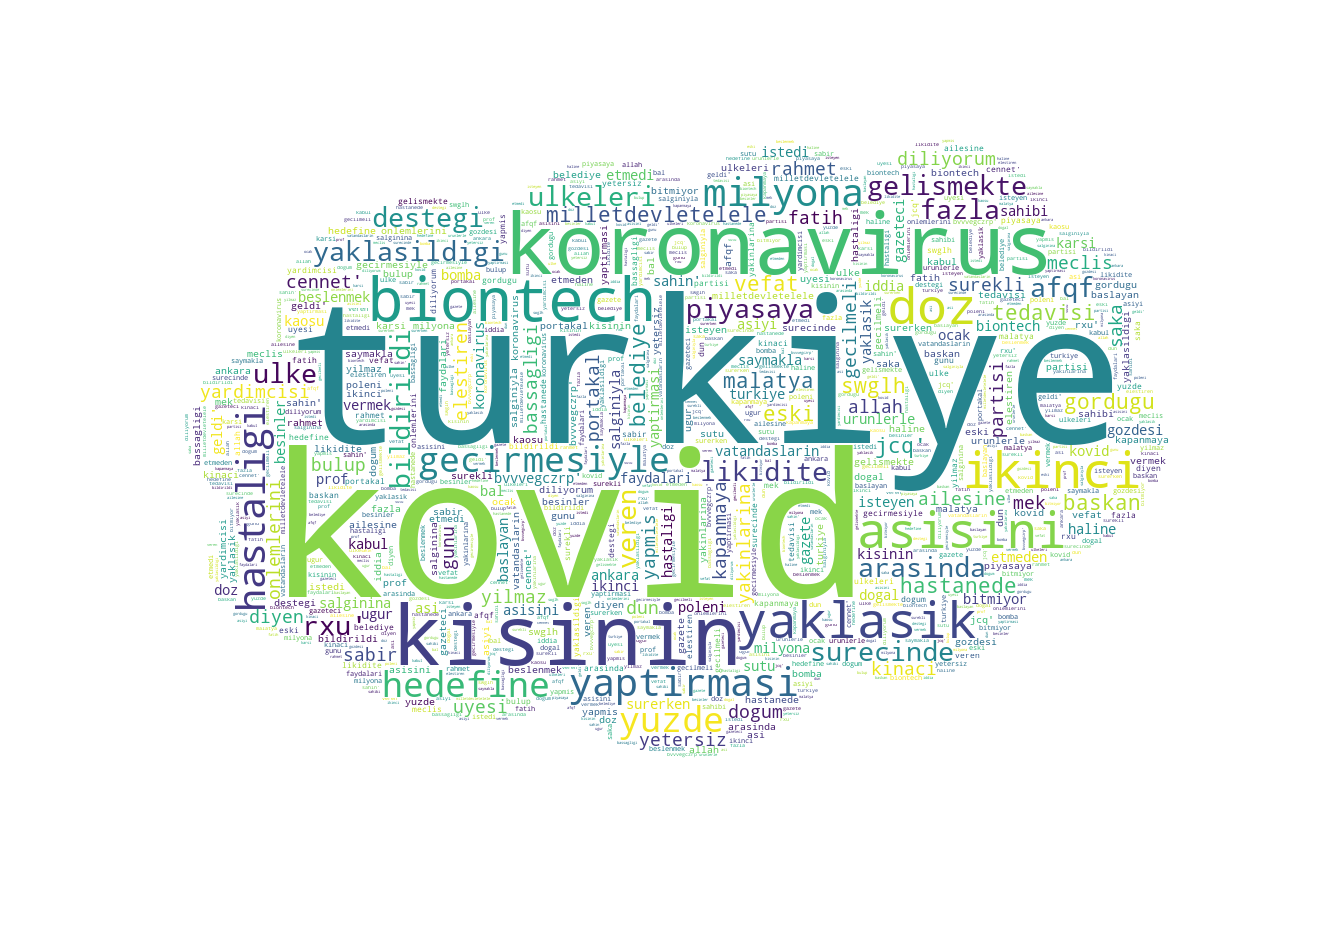

In [15]:
create_wordcloud(texty["islenmis"].values)

In [16]:
pd.Series("".join(texty["islenmis"]).split()).value_counts().head(10)

koronavirus      1891
kapsaminda        304
kovid             256
asi               209
covid             206
tedbirleri        179
once              167
baskanliginda     152
karsi             150
salgini           146
dtype: int64